In [47]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Loading Data

In [29]:
file_path="D:\House prediction model\housing.csv"

In [30]:
data = pd.read_csv(file_path)

In [31]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [32]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Missing data Analysis

In [35]:
#check for missing values
missing_values=data.isnull().sum()

#missing percentage in each column
missing_percentage=(missing_values/len(data)) * 100

print("Missing values in Each columns:", missing_values)
print("Missing percentage in Each columns:", missing_percentage)

Missing values in Each columns: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Missing percentage in Each columns: longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [36]:
#Remove the rows with missing values
data_cleaned=data.dropna()

#Verifying the missing values after the removal
print("Result after the dropping the rows with missing values")
data_cleaned.isnull().sum()

Result after the dropping the rows with missing values


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Data exploration and Visualization

In [37]:
data= data_cleaned
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


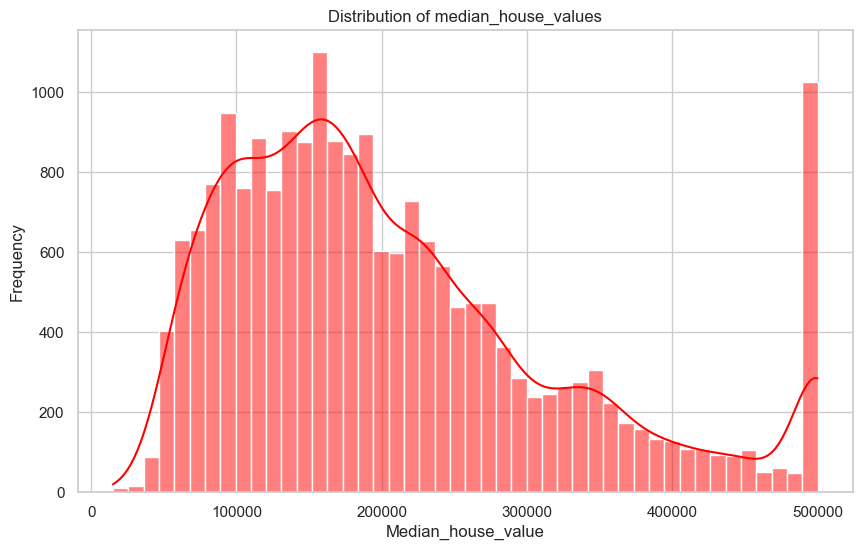

In [38]:
sns.set(style='whitegrid')
plt.figure(figsize=[10, 6])
sns.histplot(data['median_house_value'],color='red', kde=True)
plt.title('Distribution of median_house_values')
plt.xlabel('Median_house_value')
plt.ylabel('Frequency')
plt.show()


Using Interquatile range to remove outliers

Indented block

In [39]:
Q1 = data['median_house_value'].quantile(0.25)
Q3=data['median_house_value'].quantile(0.75)
IQr = Q3 - Q1

#Defining the bounds for outliers
lowerbound =  Q1 - 1.5 * IQr
upperbound = Q3 + 1.5 * IQr

#Remove outliers
data_no_outliers=data[(data['median_house_value'] >= lowerbound) & (data['median_house_value'] <= upperbound)]

#checking the shape of the data after removing the outliers
print("original data shape",data.shape)
print("New data shape without outliers", data_no_outliers.shape)

original data shape (20433, 10)
New data shape without outliers (19369, 10)


Box plot for outlier detection

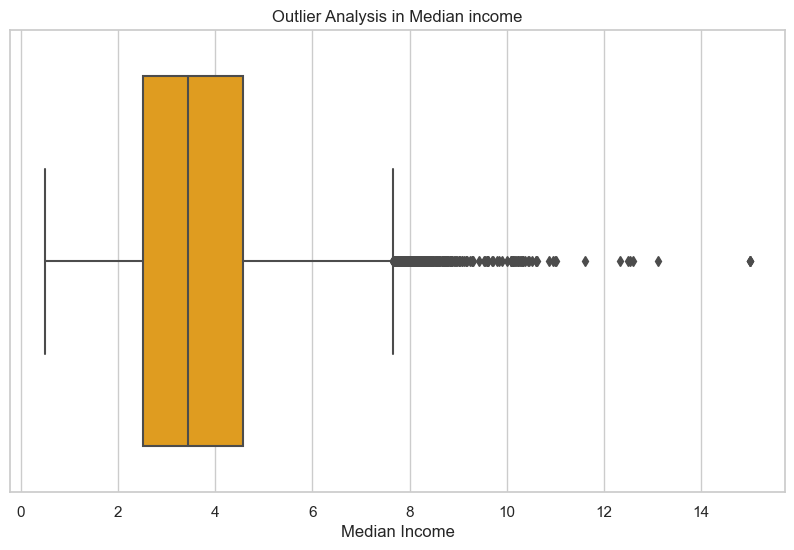

In [40]:
sns.set(style='whitegrid')
plt.figure(figsize=[10, 6])
sns.boxplot(x=data_no_outliers['median_income'], color = 'orange')
plt.title("Outlier Analysis in Median income")
plt.xlabel('Median Income')
plt.show()

In [73]:
#Calculate Q1 and Q2
Q1 = data_no_outliers['median_income'].quantile(0.25)
Q3 = data_no_outliers['median_income'].quantile(0.75)
IQr = Q3 - Q1

#Calculate the upper bound and lower bound
lowerbound = Q1 - 1.5 * IQr
upperbound = Q3 + 1.5 * IQr

#Remove the outliers
data_no_outliers_1=data_no_outliers[(data_no_outliers['median_income'] >= lowerbound) & (data_no_outliers['median_income'] <= upperbound)]

#Checking the shape after the removal of the outliers
print("Original shape",data_no_outliers.shape)
print("New shape after the removal of outliers",data_no_outliers_1.shape)

Original shape (19369, 10)
New shape after the removal of outliers (19026, 10)


In [74]:
data = data_no_outliers_1
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [75]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix= 'ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies], axis = 1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [76]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [77]:
data = data.drop('ocean_proximity_ISLAND', axis = 1)


In [78]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,True,False
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,False,False,True,False
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,False,False,True,False
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,False,False,True,False
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,False,False,True,False
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,False,False,True,False


Correlation analysis

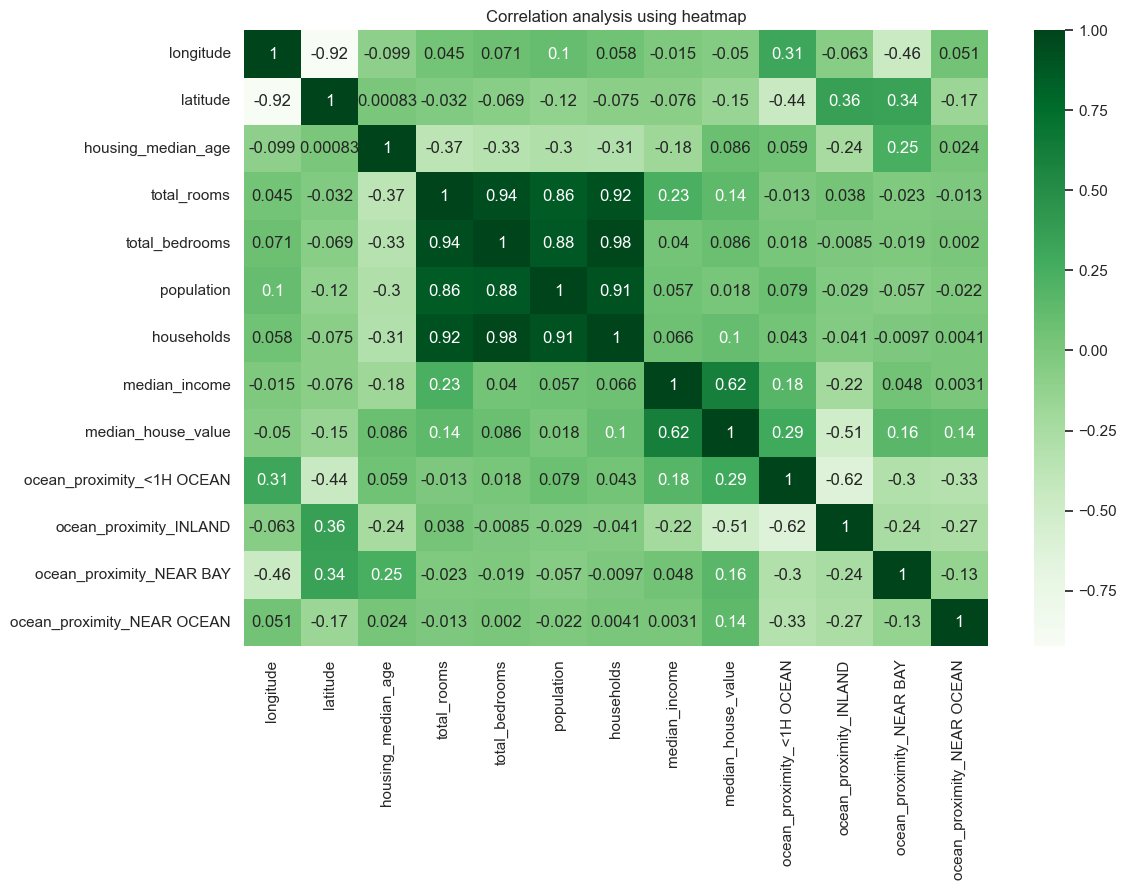

In [79]:
plt.figure(figsize=[12, 8])
sns.heatmap(data.corr(), annot= True, cmap= 'Greens')
plt.title("Correlation analysis using heatmap")
plt.show()

In [80]:
data = data.drop(columns='total_bedrooms', axis = 1)

Split the data into Train/Test

In [81]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [82]:
#Define your features[Independent_variable] and target[Dependent variable]
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target =['median_house_value']

x = data[features]
y = data[target]

#Split the data into training set and testing set
#Split the data into the 80 and 20 proportion
#Random state is for reproducing the same results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1111)

#Check the size of the split
print(f'Training set size:{x_train.shape[0]} samples')
print(f'Test set size: {x_test.shape[0]} samples')

Training set size:15220 samples
Test set size: 3806 samples


Training

In [92]:
#Adding a constant because statsmodel's OLS doesn't include it by default
x_train_const=sm.add_constant(x_train)
x_train_const[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']] = x_train_const[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']].astype(float)
x_train_const.info()
y_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 15220 entries, 15578 to 18139
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       15220 non-null  float64
 1   longitude                   15220 non-null  float64
 2   latitude                    15220 non-null  float64
 3   housing_median_age          15220 non-null  float64
 4   total_rooms                 15220 non-null  float64
 5   population                  15220 non-null  float64
 6   households                  15220 non-null  float64
 7   median_income               15220 non-null  float64
 8   ocean_proximity_<1H OCEAN   15220 non-null  float64
 9   ocean_proximity_INLAND      15220 non-null  float64
 10  ocean_proximity_NEAR BAY    15220 non-null  float64
 11  ocean_proximity_NEAR OCEAN  15220 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
Index: 15220 en

In [102]:
#Fit the model
model_fitted = sm.OLS(y_train, x_train_const).fit()

#printing the model summary
print(model_fitted.summary())



                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        11:59:28   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Prediction/Testing

In [97]:
x_test_const = sm.add_constant(x_test)
x_test_const[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']] = x_test_const[['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND','ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']].astype(float)
x_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,1.0,0.0,0.0,0.0
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,0.0,0.0,1.0,0.0
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,0.0,1.0,0.0,0.0
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,0.0,0.0,0.0,1.0
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117.99,33.87,17.0,2334.0,1662.0,535.0,3.0147,1.0,0.0,0.0,0.0
1454,1.0,-121.96,37.96,28.0,1838.0,899.0,270.0,5.2145,0.0,1.0,0.0,0.0
7360,1.0,-118.19,33.96,28.0,3507.0,3740.0,970.0,2.0162,1.0,0.0,0.0,0.0
19118,1.0,-122.65,38.23,52.0,1923.0,910.0,345.0,3.4500,1.0,0.0,0.0,0.0


In [98]:
test_predictions = model_fitted.predict(x_test_const)
test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

OLS assumptions

Assumption 1: Linearity

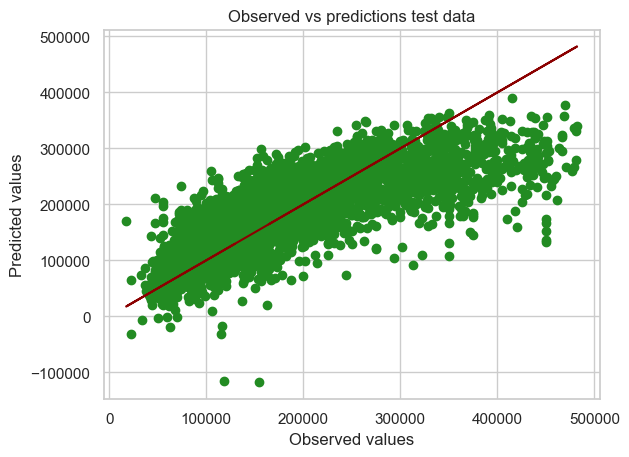

In [99]:
plt.scatter(y_test, test_predictions, color= "forestgreen")
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.title("Observed vs predictions test data")
plt.plot(y_test, y_test, color = "darkred")
plt.show()

Assumption 2 Random Samples

In [100]:
mean_residuals = np.mean(model_fitted.resid)
 
print(f"The mean of the residuals is {np.round(mean_residuals, 2)}")

The mean of the residuals is -0.0


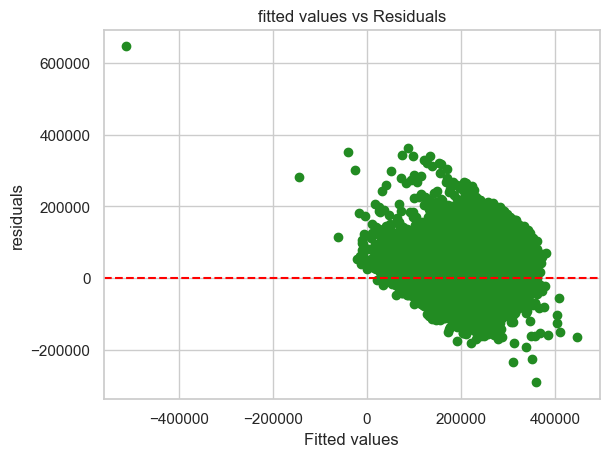

In [106]:
#Plotting the residual values
plt.scatter(model_fitted.fittedvalues,  model_fitted.resid, color = 'forestgreen')
plt.axhline(y=0, color = 'red', linestyle = '--')
plt.xlabel("Fitted values")
plt.ylabel("residuals")
plt.title("fitted values vs Residuals")
plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler
#Initializing the standardization
scaler = StandardScaler()

#Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

#Apply the same transformation to the test data
x_test_scaled = scaler.fit_transform(x_test)


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

#Create and fit the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

#Make predictions on the scaled test data
y_pred = lr.predict(x_test_scaled) 

#Calculate MSE AND RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

#Output the performance metrics
print(f'RMSE on test set: {rmse}')

RMSE on test set: 59392.14986468826


In [110]:
print(y_pred)
y_test

[[156923.40982972]
 [233254.91905542]
 [ 69470.58609083]
 ...
 [135321.55080058]
 [233034.9794058 ]
 [207119.64143246]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
